# 1. How to create a PDF

For discrete variables, creating a PDF can only be done through analytical methods, either by inspecting the distribution and fitting a known distribution such as Normal, Log Normal, Exponential etc to the data and testing

# 2. How to create a PMF
1. Create a frequency table for all unique discrete values in the distribution
2. Divide each entry of the frequency table by the number of elements in the distribution


# 3. How to a CDF

1. Sort the list of values
2. Maintain a list of cummulatative sums of the input data starting from the smallest to the largest
3. Divide each element of the cummulative sum by the sum of the items of the input data

Of these three the most difficult is **1** because we have to resort to analytical methods, fitting and testing to derive a density function for the distribution

# 4.List to PMF

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from functools import wraps, partial
import numpy as np

In [4]:
def sorted_dictionary(func):
    @wraps(func)
    def inner(*args,**kwargs):
        return dict(sorted(func(*args,**kwargs).items()))
    return inner

In [5]:
@sorted_dictionary
def list_to_pmf(series):
    n = len(series)
    d = {}
    counts = Counter(series)
    for _, key in enumerate(counts):
        d[key] = counts[key]/n
    return d

### 4b

In [6]:
@sorted_dictionary
def list_to_pmf_2(series):
    n = len(series)
    d = {}
    for i in series:
        if i in d.keys():
            d[i]+=1/n
        else:
            d[i]=1/n
    return d

# 5. Plotting the PMF

In [100]:
a = np.abs(10*np.random.randn(1, 100)).astype(np.int).tolist()[0]

<BarContainer object of 100 artists>

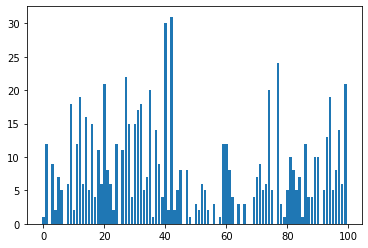

In [101]:
plt.bar(range(len(a)),a)

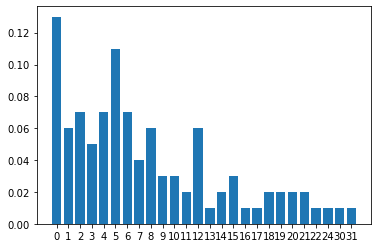

In [102]:
pmf = list_to_pmf(a)

_ = plt.bar(range(len(pmf)), list(pmf.values()))
_ = plt.xticks(range(len(pmf)), list(pmf.keys()))

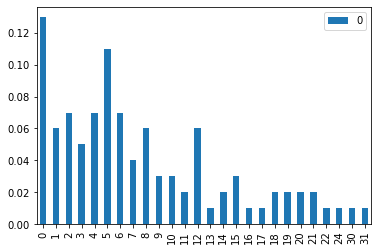

In [103]:
pmf_df = pd.DataFrame.from_dict(pmf, orient='index')
_ = pmf_df.plot.bar()

### List to CDF

In [120]:
def list_to_cdf(series):
    total = sum(series)
    cumsum = 0
    probs = []
    series.sort()
    for x in series:
        cumsum += x
        probs.append(cumsum/total)
    return probs

### Plotting the CDF

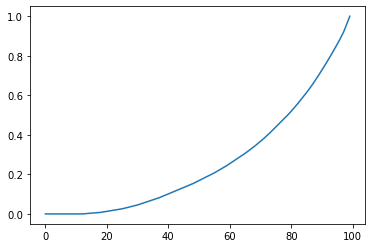

In [121]:
probs = list_to_cdf(a)
_ = plt.plot(range(len(probs)), probs)

# 6. CDF via interpolation

[0, 33, 66, 99]
[0.0, 0.0611183355006502, 0.31859557867360205, 1.0]


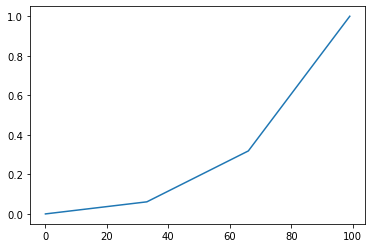

In [141]:
selected_ids = np.linspace(0,len(probs)-1,4).astype(int).tolist()
print(selected_ids)
ids = np.linspace(0,len(probs)-1,len(probs))
cdf_probs = [probs[i] for i in selected_ids]
print(cdf_probs)
cdf_interpol = np.interp(ids,selected_ids,cdf_probs)
cdf_interpol
_ = plt.plot(range(len(cdf_interpol)), cdf_interpol)

# 7. Percentiles

In [122]:
def percentile(percent, samples, key=lambda x:x):
    """ 
    Find the percentile of a list of values. 
    @parameter N - is a list of values. Note N MUST BE already sorted. 
    @parameter percent - a float value from 0.0 to 1.0. 
    @parameter key - optional key function to compute value from each element of N. 
    @return - the percentile of the values 
    """ 

    if samples is None: 
        return None 

    k = (len(samples)-1) * percent 
    f = math.floor(k) 
    c = math.ceil(k) 

    if f == c:
        return key(samples[int(k)]) 

    d0 = key(samples[int(f)]) * (c-k)
    d1 = key(samples[int(c)]) * (k-f)

    return (d0+d1)

def percentile_2(scores,percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

def inverse_cdf(samples,prob):
    samples.sort()
    index = int(prob * (len(samples)-1))
    return samples[index]

### 25 Percentile

In [123]:
first_quartile = percentile(0.25,a)
first_quartile

2.0

### 50 Percentile

In [124]:
second_quartile = percentile(.5,a)
second_quartile

6.0

### 75 Percentile

In [125]:
third_quartile = percentile(0.75,a)
print(third_quartile)

12.0


### Comments
The x percentile ,i.e , the first number greater than x percent of the sample is the same as the inverse of the CDF function. The inverse CDF calculated from the dictionary output of the CDF function might yeild higher than normal results because  of the binning effect of frequency counts.

# 8. Partial function for 25 percentile

In [85]:
first_quartile = partial(percentile,0.25,key=lambda x:x)
a.sort()
first_quartile(a)

5.0